# Evaluation analysis

We will be taking a look at the evaluations from the data folder ../data/ ([notebook ](../data/evaluations.csv), [github](https://github.com/sidgek/msoppgave/tree/master/data/evaluations.csv)).

## Setup

Before looking at the data, a list of imports and the version of libraries used is reported.

In [1]:
# Built-in python libraries
import platform
from glob import glob
from itertools import chain

# 3rd-party libraries
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import IPython
from IPython.utils.coloransi import TermColors

# Print versions.
print('Python version: {}'.format(platform.python_version()))
print('IPython version: {}'.format(IPython.__version__))
print('matplotlib version: {}'.format(matplotlib.__version__))
print('numpy version: {}'.format(np.__version__))
print('pandas version: {}'.format(pd.__version__))


# Initialize the backend for Jupyter
%matplotlib notebook

# Set style-sheet to grayscale.
matplotlib.style.use('ggplot')
colormap = plt.cm.get_cmap('RdYlBu_r')
C = [colormap(x/5) for x in range(5)]
# Set figure font to serif.
plt.rcParams['font.family'] = 'serif'

# Set how many columns to show in tables.
pd.options.display.max_columns = 50
pd.options.display.max_rows = 400
# Set the format to print float values to 3 decimal points.
pd.options.display.float_format = lambda x: '%.3f' % x

Python version: 3.6.1
IPython version: 5.3.0
matplotlib version: 2.0.2
numpy version: 1.12.1
pandas version: 0.20.1


# The data

First we load the CSV file into a [pandas DataFrame](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html), print the amount of samples and take a look at the column headers of the dataset.

In [2]:
file = '../data/evaluations.csv'

conversion_dict = {'research_type': lambda x: int(x == 'E')}

evaluation_data = pd.read_csv(file, sep=',', header=0, index_col=0, converters=conversion_dict)

print('Amount of samples: {}'.format(len(evaluation_data.index)))

column_headers = evaluation_data.columns.values
print('\nColumn headers: {}'.format(column_headers))

Amount of samples: 400

Column headers: ['title' 'research_type' 'result_outcome' 'affiliation'
 'problem_description' 'goal/objective' 'research_method'
 'research_question' 'hypothesis' 'prediction' 'contribution' 'pseudocode'
 'open_source_code' 'open_experiment_code' 'train' 'validation' 'test'
 'results' 'hardware_specification' 'software_dependencies'
 'third_party_citation' 'experiment_setup' 'evaluation_criteria' 'authors'
 'link' 'comments' 'conference']


There are 400 samples with 27 columns in total for each sample. However, some columns are not necessary for further analysis: *title*, *authors*, *link*, *comments*. The *comments* column contains short messages such as *"Points to an extended paper"* or *"Links to appendix which links to code"* to give extra information in case an evaluation is unclear. The other three identify which paper was evaluated. These columns are therefore removed from the dataframe.

In [ ]:
evaluation_data.drop(['title', 'link', 'authors', 'comments'], axis=1, inplace=True)
column_headers = evaluation_data.columns.values
print('\nColumn headers: {}'.format(column_headers))

The remaining 23 columns can be placed in more clarifying categories. All data is boolean with the value 0 or 1, unless otherwise specified below.

**Miscellaneous** Variables describing the research  
*research_type* - Experimental (1) or theoretical (0).  
*result_outcome* - Novel research or not.  
*affiliation* - The affiliation of the authors; academia (0), collaboration (1), industry (2).  
*conference* - The conference the paper was accepted to.  
*third_party_citation* - Is third-party source code or data referenced?

**Research Transparency** How well documented is the research method?  
*problem_description* - The problem the research seeks to solve.  
*goal/objective* - The objective of the research.  
*research_method* - Research method used.  
*research_question* - Research question(s) asked.  
*hypothesis* - Investigated hypothesis.  
*prediction* - Predictions related to the hypothesis.  
*contribution* - Contribution of the research.  
*Note: The variables under Research Transparency are 1 if explicitly mentioned in the paper, otherwise 0.*

**Experiment Documentation** How well is the experiment documented?  
*open_experiment_code* - Is the experiment code available?  
*hardware_specification* - Hardware used.  
*software_dependencies* - For method or experiment.  
*experiment_setup* - Is the experiment setup described with parameters etc.?  
*evaluation_criteria* - Specification of evaluation criteria.

**Method Documentation** How well is the method under investigation documented?  
*pseudocode* - Method described in pseudocode.  
*open_source_code* - Is the method code available?

**Open Data** How well is the data documented, and is it available?  
*train* - Training set specification.  
*validation* - Validation set specification.  
*test* - Test set specification.  
*results* - Raw results data.  
*Note: If no data is open sourced all will be 0. If data is open source but the sets are not specified train or test will be set to 1 depending on whether the research requires training or not. If the research does not require training, train and validation does not have a value set.*

A look at the first two samples of the dataset show the difference between experimental and theoretical papers.

In [3]:
evaluation_data.head(2)

,title,research_type,result_outcome,affiliation,problem_description,goal/objective,research_method,research_question,hypothesis,prediction,contribution,pseudocode,open_source_code,open_experiment_code,train,validation,test,results,hardware_specification,software_dependencies,third_party_citation,experiment_setup,evaluation_criteria,authors,link,comments,conference
index,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,A Generative Model for Recognizing Mixed Group...,1,1,0,1,0,0,0,0,0,1,1.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,"Zheng Zhou, Kan Li, Xiangjian He and Mengmeng Li",http://www.ijcai.org/Proceedings/16/Papers/514...,NaN,IJCAI 16
2,Proving the Incompatibility of Efficiency and ...,0,1,0,0,0,0,0,0,0,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,"Florian Brandl, Felix Brandt and Christian Geist",http://www.ijcai.org/Proceedings/16/Papers/024...,NaN,IJCAI 16


The first sample is an experimental paper (**research_type=1**) and has values set for all the columns.
The second paper, however, is a theoretical paper (**research_type=0**) and only has values set for the *Miscellaneous*, and *Research Transparency* categories, excluding the *third_part_citation* column. Note that the datafile has Experimental noted as E and theoretical noted as T.

Cells with missing values are represented as `NaN` in pandas and can be seen for all the columns exclusive to experimental papers in the second sample above. For experimental papers where training is not relevant, both the *train* and *validation* columns will show as `NaN`. To add `NaN` to visualisations below, we fill them out with the value -1.

Additionally, we split the experimental papers into a separate dataframe for plotting later.

In [4]:
evaluation_data = evaluation_data.fillna(-1)
experimental_data = evaluation_data[evaluation_data.research_type == 1]

## Miscellaneous
We start with the miscellaneous category, defining the plot function which will be used for all categories. The only variable not plotted is the `conference` variable, which has its frequencies printed out instead.

Variables describing the research  
*research_type* - Experimental (1) or theoretical (0).  
*result_outcome* - Novel research or not.  
*affiliation* - The affiliation of the authors; academia (0), collaboration (1), industry (2).  
*conference* - The conference the paper was accepted to.  
*third_party_citation* - Is third-party source code or data referenced?

In [5]:
def plot_full_series(series, title, labels, width=0.4):
    bins=len(labels)
    Y, X = np.histogram(series, bins=bins)
    total_Y = sum(Y)
    fig = plt.figure(figsize=(4,4))
    ax = plt.subplot(111)
    plt.bar(X[:-1], Y, color=C, width=width, axes=ax)
    ax.set_ylim(0, total_Y + 20)
    ax.set_xticks(X[:-1])
    ax.set_xticklabels(labels)
    # ax.set_title(title) Removed in favor of captions in report.
    
    # Add amount labels to bars
    for y, x in zip(Y, X[:-1]):
        label = '{:3.0f} ({:.1%})'.format(y, y / total_Y)
        ax.text(x, y + 5, label, ha='center', va='bottom')    
    plt.show()
    fig.savefig('../doc/report/fig/{}'.format(title.replace(' ', '_')))

conference
AAAI 14     100
AAAI 16     100
IJCAI 13    100
IJCAI 16    100
dtype: int64



<IPython.core.display.Javascript object>


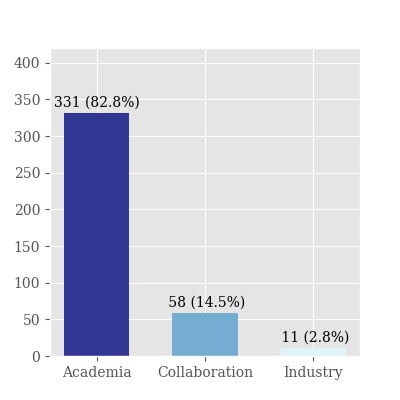

<IPython.core.display.Javascript object>


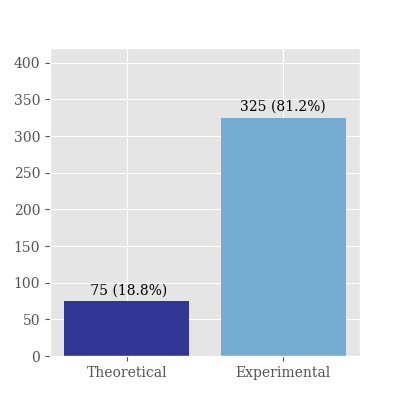

<IPython.core.display.Javascript object>


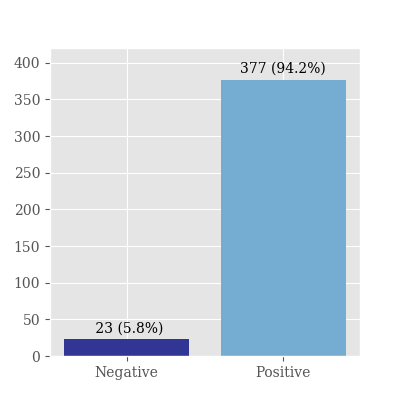

<IPython.core.display.Javascript object>


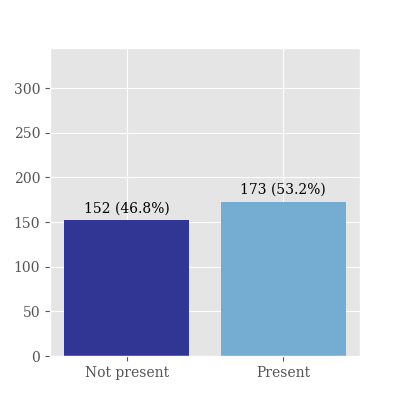

In [6]:
print(evaluation_data.groupby('conference').size(), end='\n\n')

plot_full_series(evaluation_data.affiliation, 'Affiliation', ['Academia', 'Collaboration', 'Industry'])
plot_full_series(evaluation_data.research_type, 'Research Type', ['Theoretical', 'Experimental'])
plot_full_series(evaluation_data.result_outcome, 'Result Outcome', ['Negative', 'Positive'])
plot_full_series(experimental_data.third_party_citation, 'Third-party Citation', ['Not present', 'Present'])

## Research Transparency
How well documented is the research method?

*problem_description* - The problem the research seeks to solve.  
*goal/objective* - The objective of the research.  
*research_method* - Research method used.  
*research_question* - Research question(s) asked.  
*hypothesis* - Investigated hypothesis.  
*prediction* - Predictions related to the hypothesis.  
*contribution* - Contribution of the research.  
*Note: The variables under Research Transparency are 1 if explicitly mentioned in the paper, otherwise 0.*

<IPython.core.display.Javascript object>


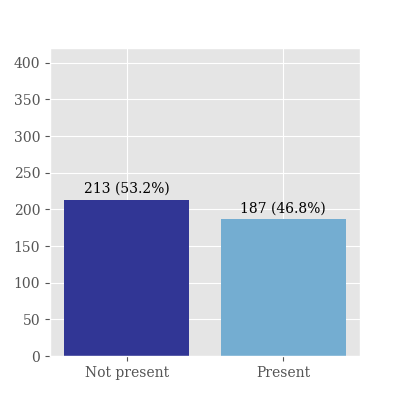

<IPython.core.display.Javascript object>


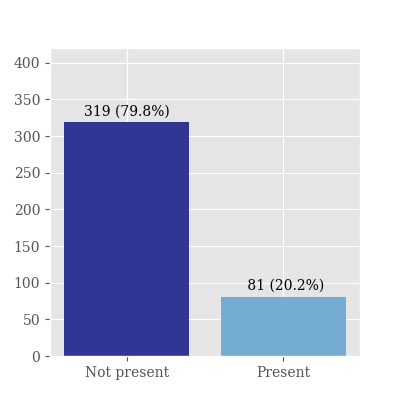

<IPython.core.display.Javascript object>


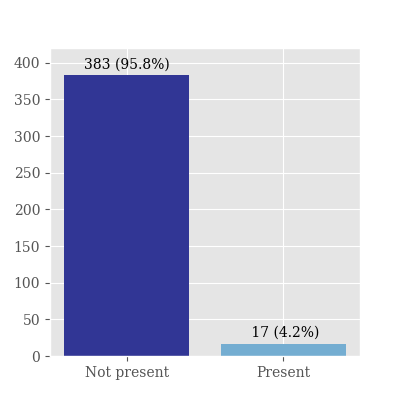

<IPython.core.display.Javascript object>


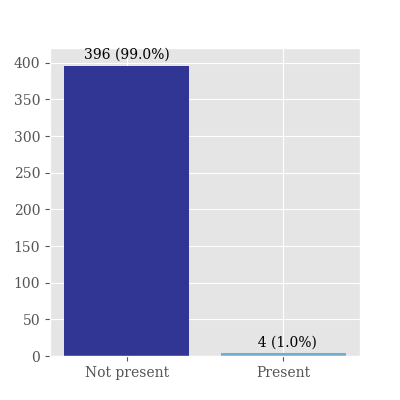

<IPython.core.display.Javascript object>


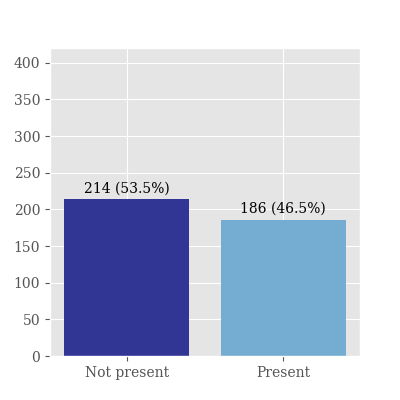

<IPython.core.display.Javascript object>


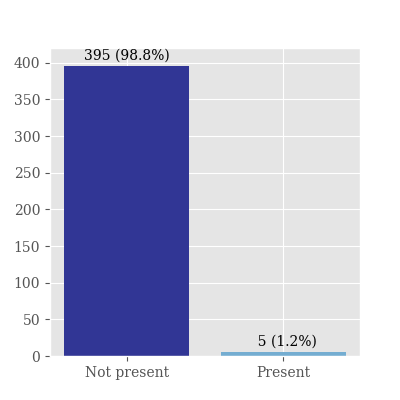

<IPython.core.display.Javascript object>


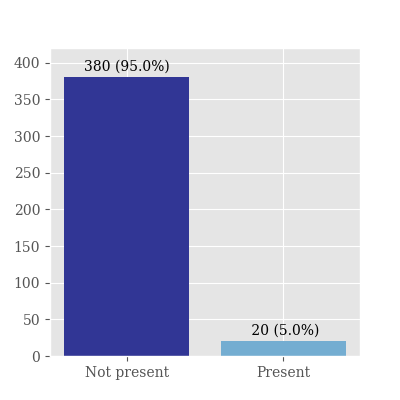

In [7]:
plot_full_series(evaluation_data.contribution, 'Contribution', ['Not present', 'Present'])
plot_full_series(evaluation_data['goal/objective'], 'Goal or Objective', ['Not present', 'Present'])
plot_full_series(evaluation_data.hypothesis, 'Hypothesis', ['Not present', 'Present'])
plot_full_series(evaluation_data.prediction, 'Prediction', ['Not present', 'Present'])
plot_full_series(evaluation_data.problem_description, 'Problem Description', ['Not present', 'Present'])
plot_full_series(evaluation_data.research_method, 'Research Method', ['Not present', 'Present'])
plot_full_series(evaluation_data.research_question, 'Research Question', ['Not present', 'Present'])

## Experiment Documentation
How well is the experiment documented?

evaluation_criteria - Specification of evaluation criteria.  
experiment_setup - Is the experiment setup described with parameters etc.?  
hardware_specification - Hardware used.  
open_experiment_code - Is the experiment code available?  
software_dependencies - For method or experiment.  

<IPython.core.display.Javascript object>


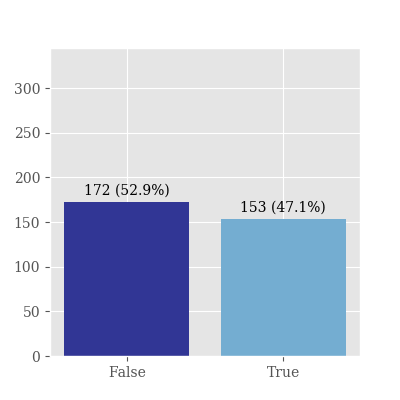

<IPython.core.display.Javascript object>


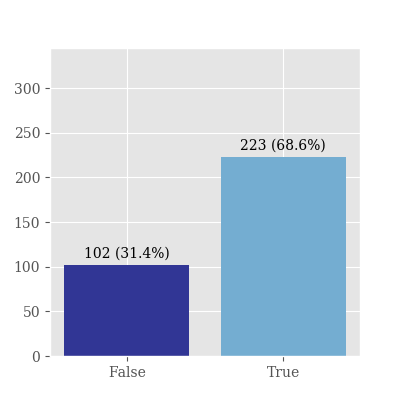

<IPython.core.display.Javascript object>


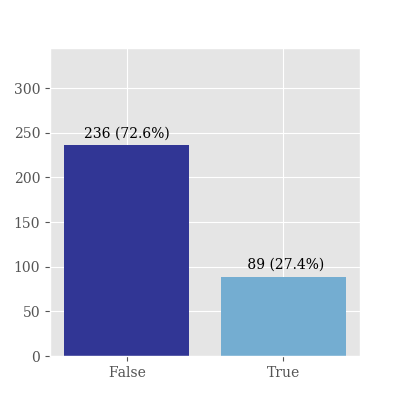

<IPython.core.display.Javascript object>


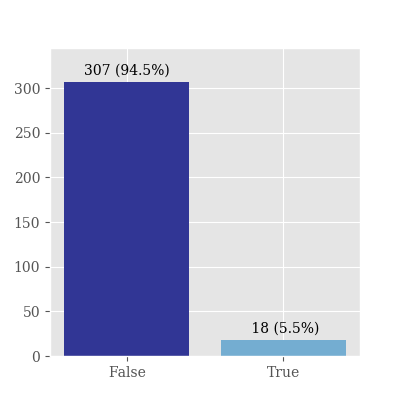

<IPython.core.display.Javascript object>


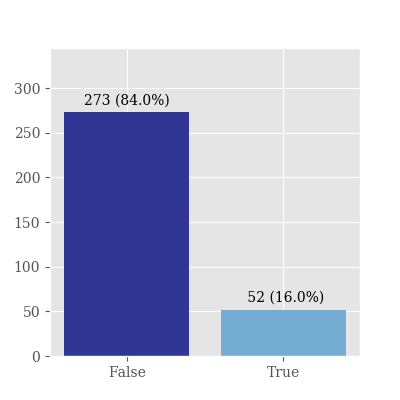

In [8]:
plot_full_series(experimental_data.evaluation_criteria, 'Evaluation Criteria', ['False', 'True'])
plot_full_series(experimental_data.experiment_setup, 'Experiment Setup', ['False', 'True'])
plot_full_series(experimental_data.hardware_specification, 'Hardware Specification', ['False', 'True'])
plot_full_series(experimental_data.open_experiment_code, 'Open Experiment Code', ['False', 'True'])
plot_full_series(experimental_data.software_dependencies, 'Software Dependencies', ['False', 'True'])

## Method Documentation
How well is the method under investigation documented?

pseudocode - Method described in pseudocode.  
open_source_code - Is the method code available?

<IPython.core.display.Javascript object>


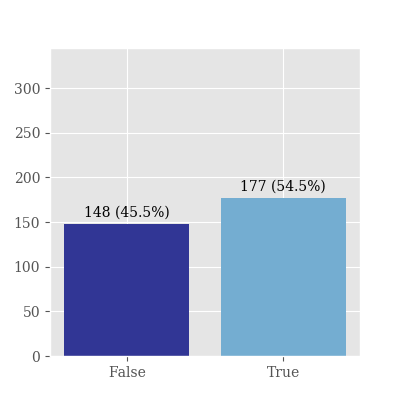

<IPython.core.display.Javascript object>


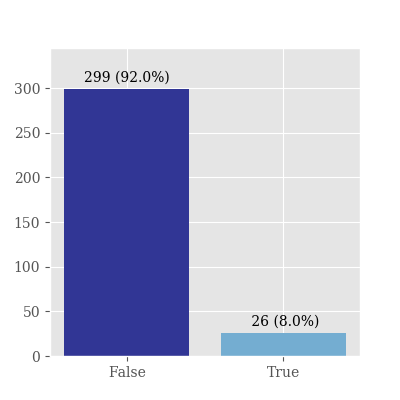

In [9]:
plot_full_series(experimental_data.pseudocode, 'Pseudocode', ['False', 'True'])
plot_full_series(experimental_data.open_source_code, 'Open Source Code', ['False', 'True'])

## Open Data
How well is the data documented, and is it available?

train - Training set specification.  
validation - Validation set specification.  
test - Test set specification.  
results - Raw results data.  

<IPython.core.display.Javascript object>


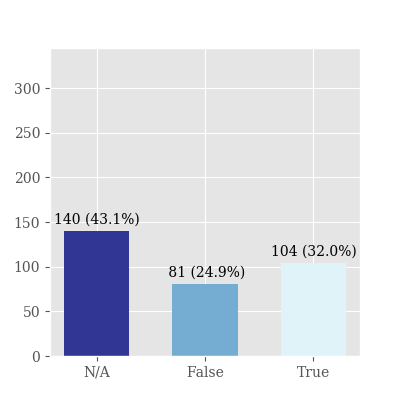

<IPython.core.display.Javascript object>


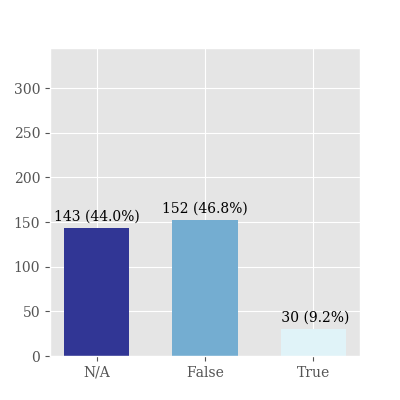

<IPython.core.display.Javascript object>


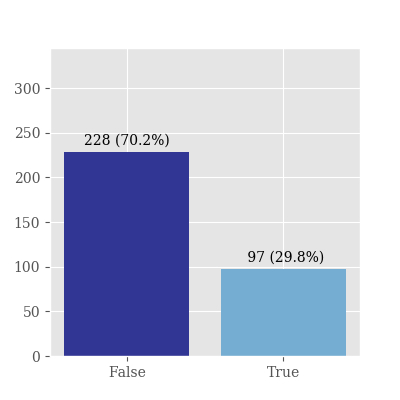

<IPython.core.display.Javascript object>


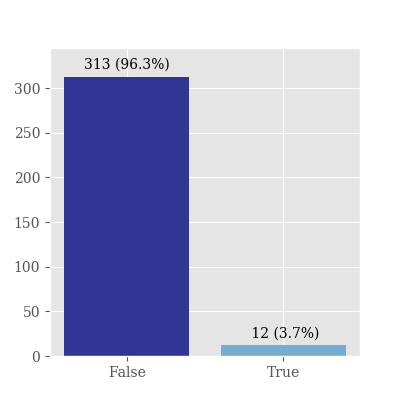

<IPython.core.display.Javascript object>


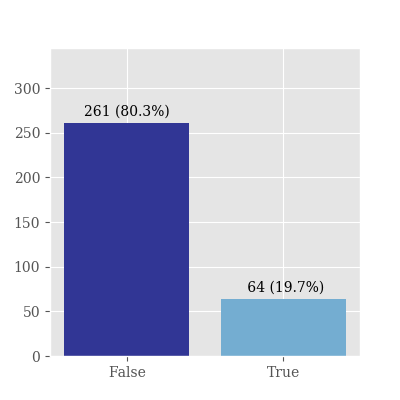

In [10]:
plot_full_series(experimental_data.train, 'Training Data', ['N/A', 'False', 'True'])
plot_full_series(experimental_data.validation, 'Validation Data', ['N/A', 'False', 'True'])
plot_full_series(experimental_data.test, 'Test Data', ['False', 'True'])
plot_full_series(experimental_data.results, 'Results Data', ['False', 'True'])
all_sets = experimental_data[['train', 'validation', 'test']].all(axis=1)
plot_full_series(all_sets, 'Data_Sets', ['False', 'True'])

## Analasys patterns
The analysis patterns will be examined for variables related to open data and source code.

### Author affiliation


In [11]:
labels_of_interest = ['open_source_code', 'open_experiment_code',
                      'train', 'validation', 'test', 'results']

for label in labels_of_interest:
    print(experimental_data.groupby('affiliation')[label].value_counts())

affiliation  open_source_code
0            0.000               242
             1.000                23
1            0.000                48
             1.000                 2
2            0.000                 9
             1.000                 1
Name: open_source_code, dtype: int64
affiliation  open_experiment_code
0            0.000                   250
             1.000                    15
1            0.000                    48
             1.000                     2
2            0.000                     9
             1.000                     1
Name: open_experiment_code, dtype: int64
affiliation  train 
0            -1.000    124
             1.000      86
             0.000      55
1            0.000      19
             1.000      16
             -1.000     15
2            0.000       7
             1.000       2
             -1.000      1
Name: train, dtype: int64
affiliation  validation
0            -1.000        125
             0.000         115
             1.

### Conference differences

In [12]:
for label in labels_of_interest:
    print(experimental_data.groupby('conference')[label].value_counts())
      

conference  open_source_code
AAAI 14     0.000               78
            1.000                7
AAAI 16     0.000               76
            1.000                9
IJCAI 13    0.000               69
            1.000                2
IJCAI 16    0.000               76
            1.000                8
Name: open_source_code, dtype: int64
conference  open_experiment_code
AAAI 14     0.000                   81
            1.000                    4
AAAI 16     0.000                   79
            1.000                    6
IJCAI 13    0.000                   71
IJCAI 16    0.000                   76
            1.000                    8
Name: open_experiment_code, dtype: int64
conference  train 
AAAI 14     -1.000    36
            1.000     25
            0.000     24
AAAI 16     1.000     39
            0.000     26
            -1.000    20
IJCAI 13    -1.000    50
            0.000     12
            1.000      9
IJCAI 16    -1.000    34
            1.000     31
            0

### Novelty of research
This analysis pattern has been discarded due to problems with the evaluation of Result outcome.

## Reproducibility

<IPython.core.display.Javascript object>


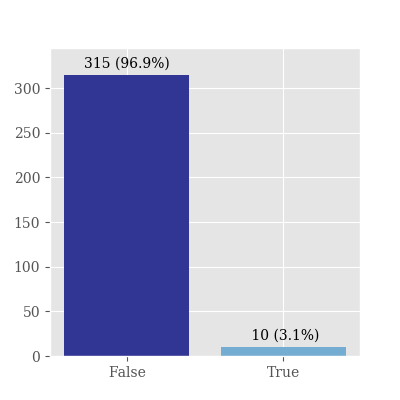

<IPython.core.display.Javascript object>


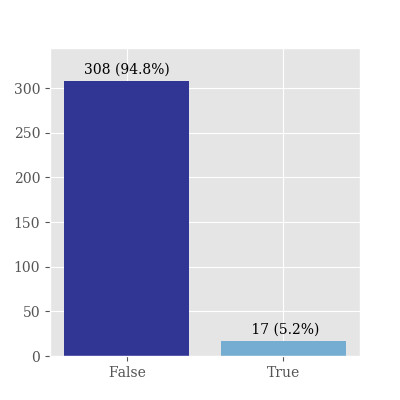

In [13]:
methods_reproducible = experimental_data[labels_of_interest[0:-1]].all(axis=1)
results_reproducible = experimental_data[labels_of_interest[0:2]].all(axis=1)

plot_full_series(methods_reproducible, 'Methods Reproducible', ['False', 'True'])
plot_full_series(results_reproducible, 'Results Reproducible', ['False', 'True'])
